## Problem Statement:
### Generate the features from the dataset and use them to recommend the books accordingly to the users.

<h4>Importing required Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


<h4>Reading dataset using pandas</h4>

In [2]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

## Performing EDA on Dataset
Now, we will explore the data to gain insights about the data. 

<h4>Displaying first 5 records</h4>

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<h4>View dimensions of datasets</h4>

In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


<h4>Checking for Null values</h4>

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [9]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [10]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [11]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [15]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


<h4>Age have around 39% missing values</h4>

<h4>Age Distribution</h4>

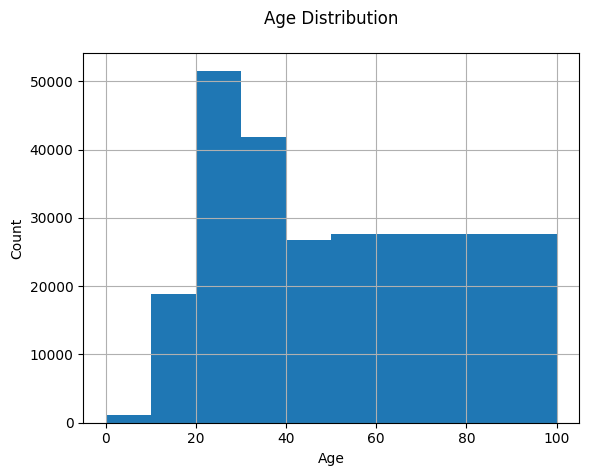

In [16]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h4>The most active users are among those in their 20–30s</h4>

<h4>Let's check for outliers in age column</h4>

Text(0.5, 1.0, 'Find outlier data in Age column')

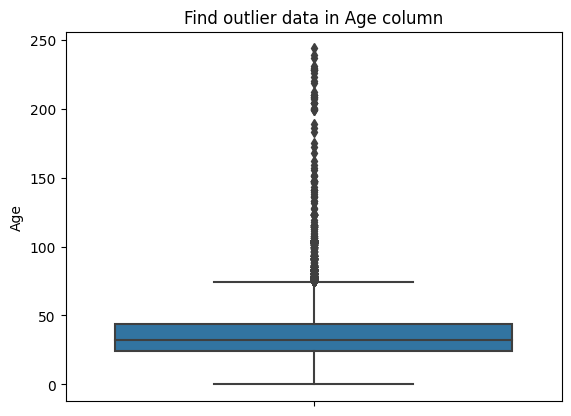

In [17]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

<h4>We have Outlier data in Age</h4>

<h4>Let's find our unique value in Location column</h4>

In [18]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [19]:
users.Location.nunique()

57339

<h4>57339 unique Value it's really hard to understand</h4>
<br>
<h5>So lets create column Country
</h5>

In [20]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [21]:
users.Country.nunique()

529

In [22]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [23]:
users.head(2)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa


In [24]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [25]:
users['Country']=users['Country'].astype('str')

In [26]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

<h4>Some data has Misspellings Let's correct it.</h4>

In [27]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

<h5>Let's treat outliers in users age</h5>

Text(0.5, 1.0, 'Age Distribution Plot')

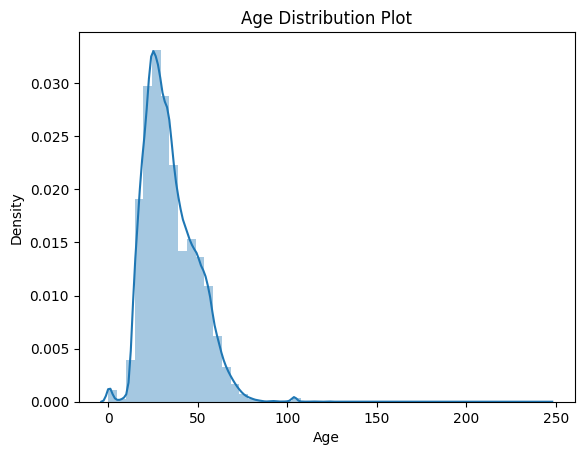

In [28]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

<h4>Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs</h4>

In [29]:
users.Age.isna().sum()

110762

In [30]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [31]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

In [32]:
users.describe()

,User-ID,Age
count,278858.00000,166848.000000
mean,139429.50000,34.746638
std,80499.51502,13.633051
min,1.00000,5.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,100.000000


<h4>Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.</h4>

In [33]:
users['Age'] = round(users['Age'].fillna(users.groupby('Country')['Age'].transform('median')))

In [34]:
users.Age.isna().sum()

276

<h4>Still we have 276 Nan values let's fill them with mean</h4>

In [35]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [36]:
# Round off Age column and convert to integer
users['Age'] = users['Age'].round().astype(int)

In [37]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

<h4>Checking for Duplicated Values</h4>

In [38]:
books.duplicated().sum()

0

In [39]:
ratings.duplicated().sum()

0

In [40]:
users.duplicated().sum()

0

<h4>Merging Datasets</h4>

In [41]:
# Merging Books & Ratings dataset
book_rating = ratings.merge(books,on='ISBN')
book_rating.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [42]:
book_rating.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

In [43]:
book_rating = book_rating.dropna()

In [44]:
# View dimension of merged dataset
book_rating.shape

(1031132, 10)

In [45]:
# View summary of dataset
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031132 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031132 non-null  int64 
 1   ISBN                 1031132 non-null  object
 2   Book-Rating          1031132 non-null  int64 
 3   Book-Title           1031132 non-null  object
 4   Book-Author          1031132 non-null  object
 5   Year-Of-Publication  1031132 non-null  object
 6   Publisher            1031132 non-null  object
 7   Image-URL-S          1031132 non-null  object
 8   Image-URL-M          1031132 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [46]:
# Merging book_rating and users dataset
book_rating_user = book_rating.merge(users,on='User-ID')
book_rating_user.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,36,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,23,usa


In [47]:
# View dimension of merged dataset
book_rating_user.shape

(1031132, 12)

In [48]:
# View summary of dataset
book_rating_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031132 entries, 0 to 1031131
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031132 non-null  int64 
 1   ISBN                 1031132 non-null  object
 2   Book-Rating          1031132 non-null  int64 
 3   Book-Title           1031132 non-null  object
 4   Book-Author          1031132 non-null  object
 5   Year-Of-Publication  1031132 non-null  object
 6   Publisher            1031132 non-null  object
 7   Image-URL-S          1031132 non-null  object
 8   Image-URL-M          1031132 non-null  object
 9   Image-URL-L          1031132 non-null  object
 10  Age                  1031132 non-null  int32 
 11  Country              1031132 non-null  object
dtypes: int32(1), int64(2), object(9)
memory usage: 98.3+ MB


In [49]:
book_rating_user.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Age                    0
Country                0
dtype: int64

### Visualization

<h4>Top 10 Books according to ratings</h4>

In [50]:
book_rating_user.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:10]

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Rating, dtype: int64

<h4>Top 10 Authors according to ratings</h4>

In [51]:
book_rating_user.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)[:10]

Book-Author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: Book-Rating, dtype: int64

Text(0.5, 1.0, 'Count of users Country wise')

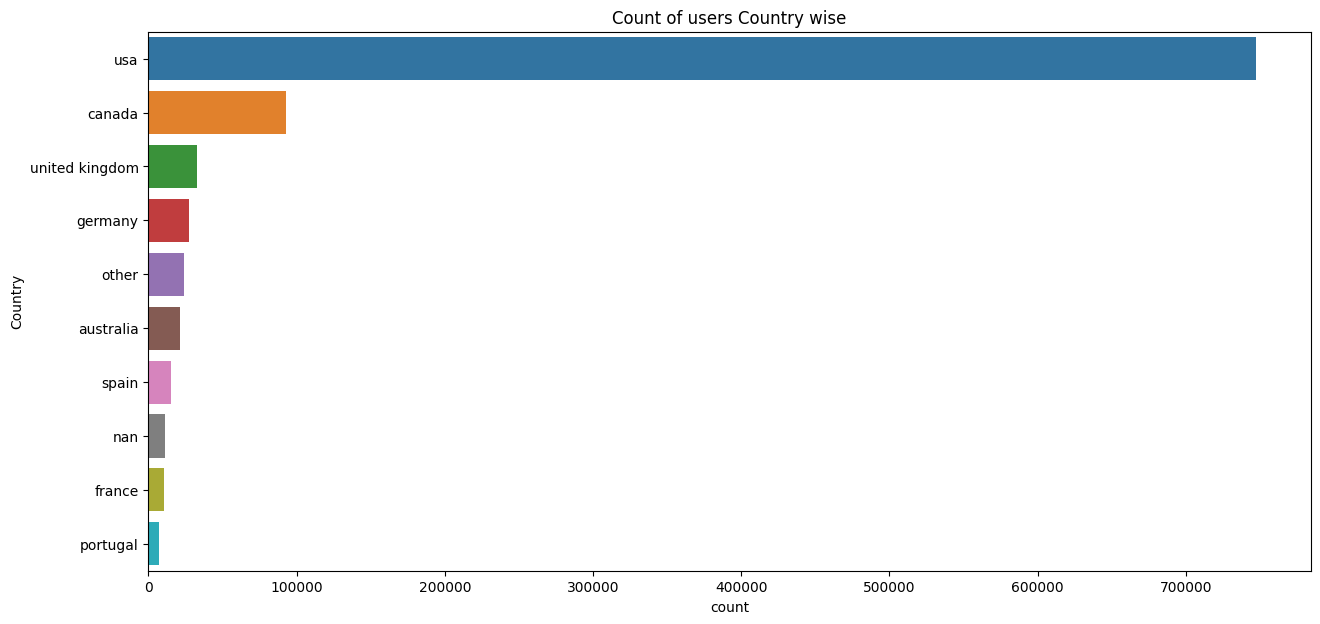

In [52]:
#Count of users Country wise
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=book_rating_user,order=pd.value_counts(book_rating_user['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

<h4>Most number of users are from USA</h4>

Text(0.5, 1.0, 'Rating distribution')

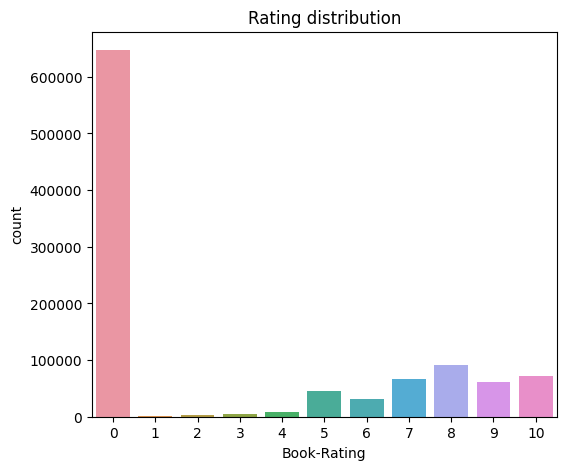

In [53]:
# Rating Distribution
plt.figure(figsize=(6,5))
sns.countplot(x="Book-Rating", data=book_rating_user)
plt.title('Rating distribution')

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [54]:
#segragating implicit and explict ratings datasets
ratings_explicit = book_rating_user[book_rating_user['Book-Rating'] != 0]
ratings_implicit = book_rating_user[book_rating_user['Book-Rating'] == 0]

In [55]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383841, 12)
ratings_implicit dataset (647291, 12)


Text(0.5, 1.0, 'Rating distribution')

<Figure size 600x500 with 0 Axes>

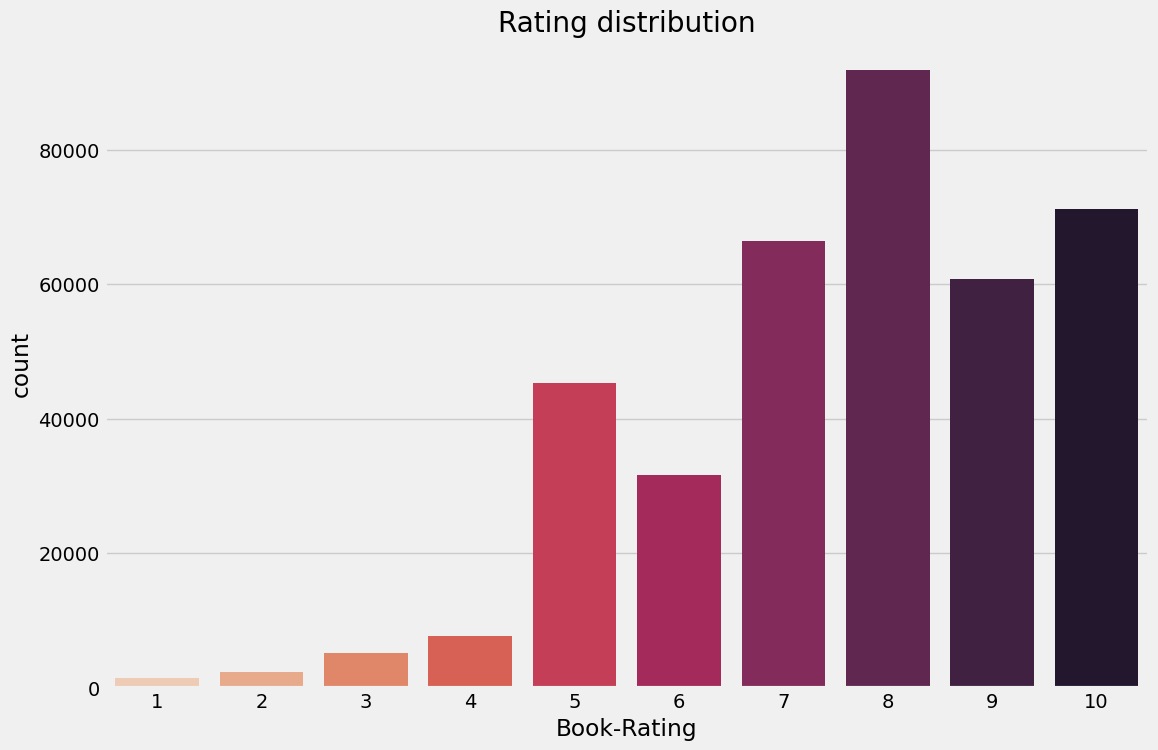

In [56]:
plt.figure(figsize=(6,5))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')
plt.title('Rating distribution')

<h4>It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times</h4>

Text(0.5, 1.0, 'Top Rated Books')

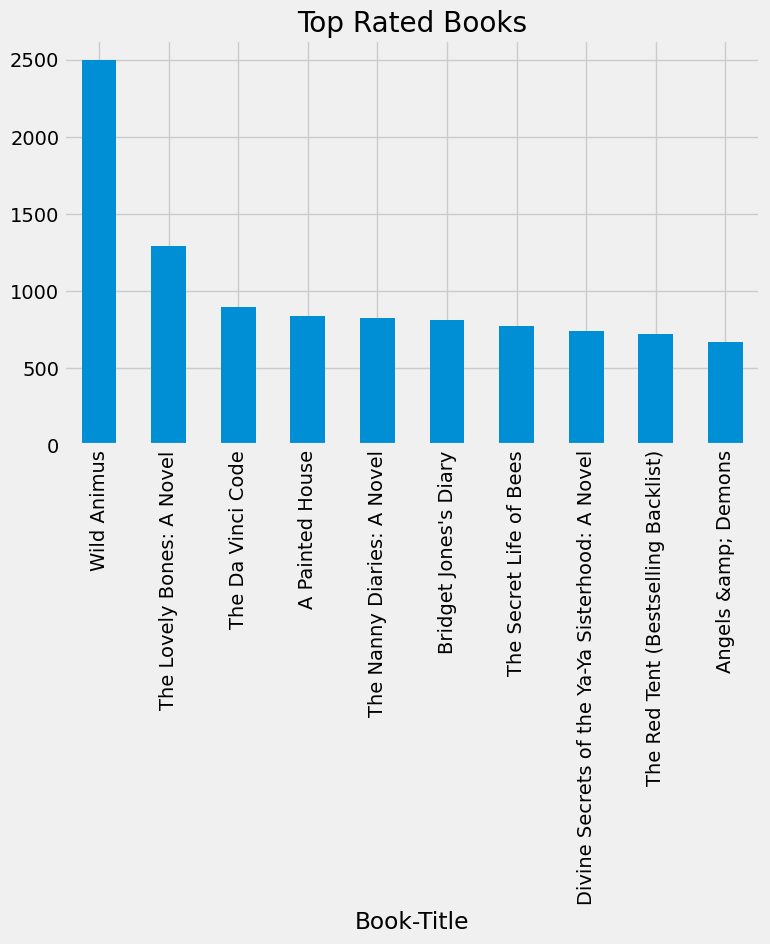

In [57]:
# Top 10 Rated books
plt.figure(figsize=(8,5))
book_rating_user.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:10].plot.bar()
plt.title('Top Rated Books')

Text(0.5, 1.0, 'Top Rated Authors(percent)')

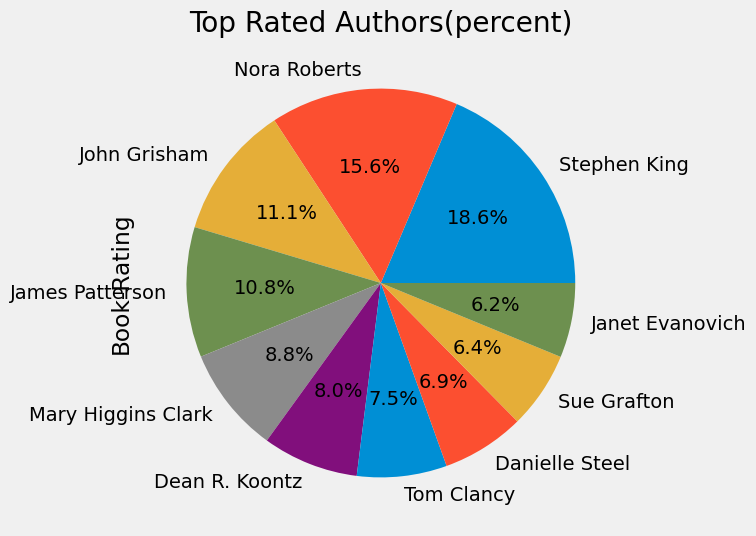

In [58]:
# Top Rated Authors
plt.figure(figsize=(10,6))
book_rating_user.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)[:10].plot.pie(autopct='%1.1f%%')
plt.title('Top Rated Authors(percent)')

<h4>Top 10 Publisher which have published the most books</h4>

Text(0.5, 1.0, 'Top 10 Publishers')

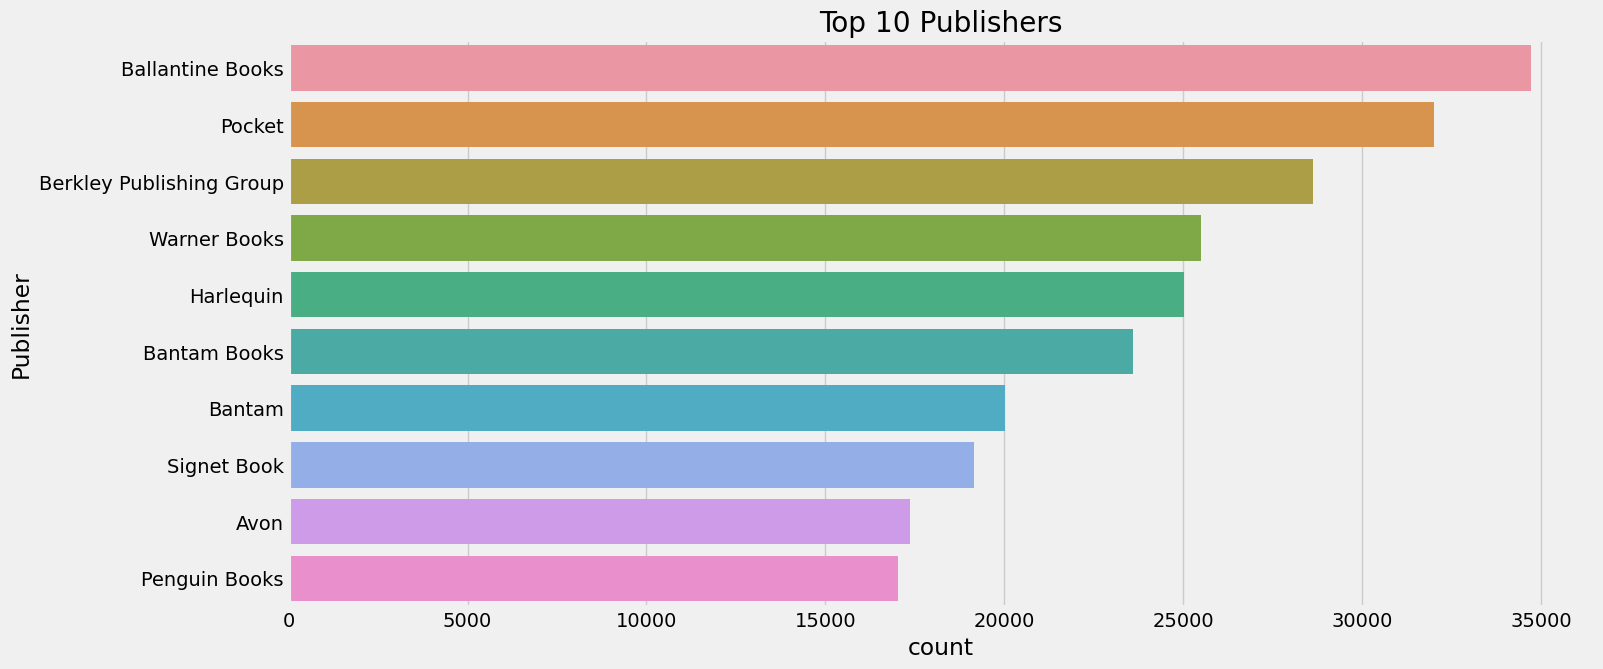

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=book_rating_user,order=pd.value_counts(book_rating_user['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

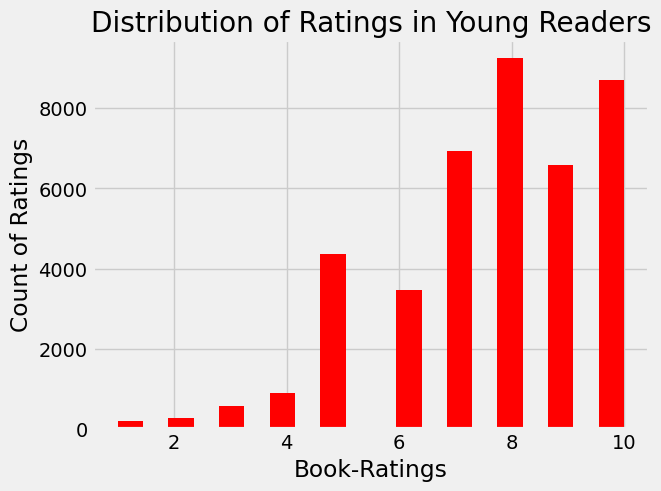

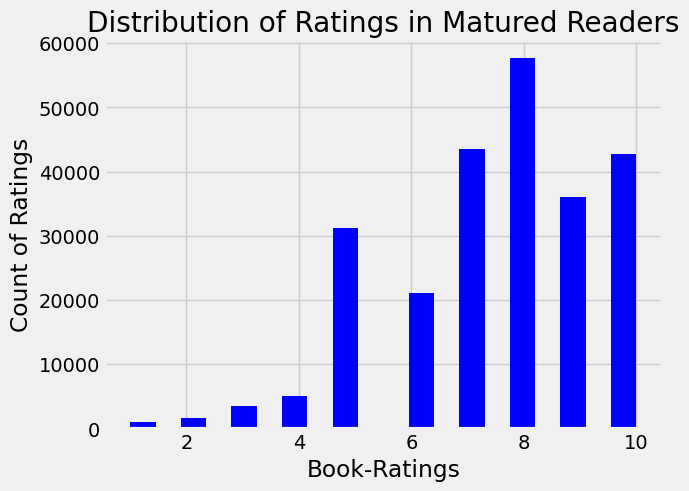

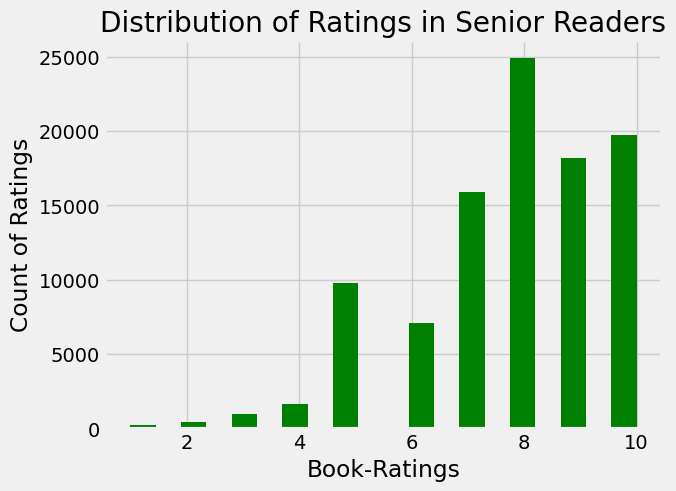

In [60]:
book_rating_user = book_rating_user[book_rating_user['Book-Rating']!=0]
young_readers = book_rating_user[book_rating_user['Age']<25]
matured_readers = book_rating_user[(book_rating_user['Age']>=25) & (book_rating_user['Age']<40)]
senior_readers = book_rating_user[book_rating_user['Age']>=40]

young_readers['Book-Rating'].hist(bins=20,color="red")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Young Readers")
plt.show()

matured_readers['Book-Rating'].hist(bins=20,color="blue")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Matured Readers")
plt.show()

senior_readers['Book-Rating'].hist(bins=20,color="green")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Senior Readers")
plt.show()

Top 5 Authors' Book Ratings distribution among young readers


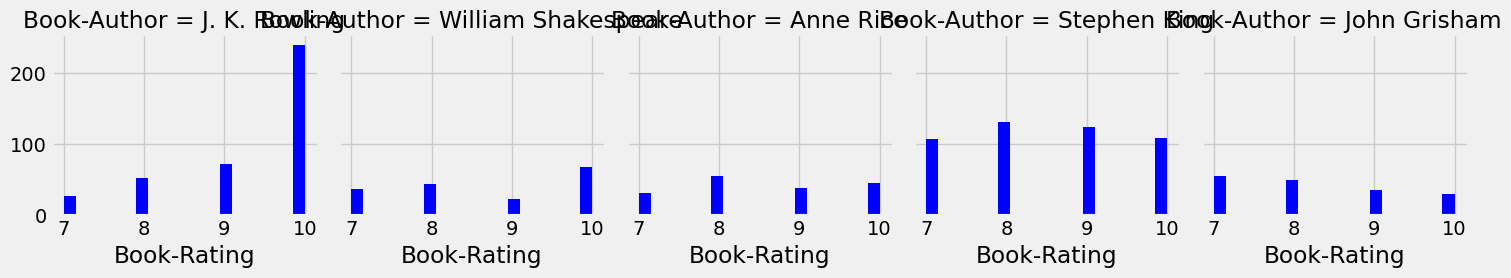

In [61]:
young_readers = young_readers[young_readers['Book-Rating']>6]
popular_authors_young = young_readers.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among young readers")
young_readers = young_readers[young_readers['Book-Author'].isin(popular_authors_young)]
graph = sns.FacetGrid(young_readers,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='blue')
plt.show()

Top 5 Authors' Book Ratings distribution among matured readers


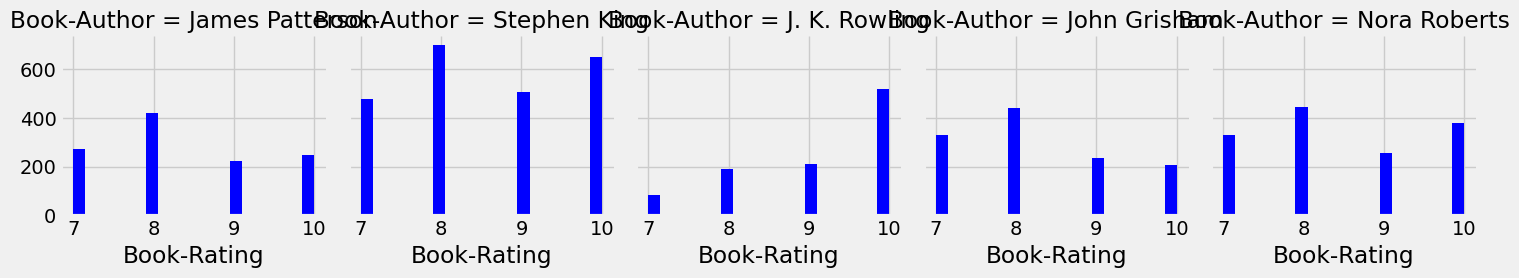

In [62]:
matured_readers = matured_readers[matured_readers['Book-Rating']>6]
popular_authors_matured = matured_readers.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among matured readers")
matured_readers = matured_readers[matured_readers['Book-Author'].isin(popular_authors_matured)]
graph = sns.FacetGrid(matured_readers,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='blue')
plt.show()

Top 5 Authors' Book Ratings distribution among senior readers


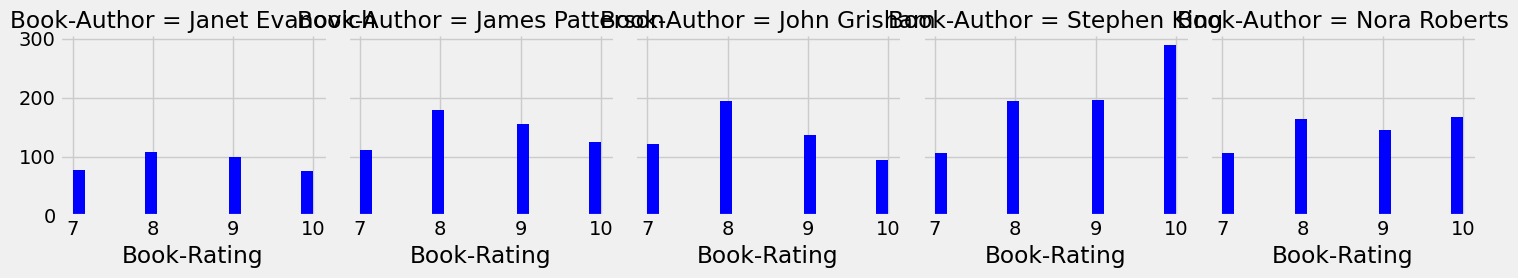

In [63]:
senior_readers = senior_readers[senior_readers['Book-Rating']>6]
popular_authors_senior = senior_readers.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among senior readers")
senior_readers = senior_readers[senior_readers['Book-Author'].isin(popular_authors_senior)]
graph = sns.FacetGrid(senior_readers,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='blue')
plt.show()

In [64]:
book_rating_user.shape

(383841, 12)

## Speed up the EDA process using pandas_profiling 

### 1. pandas_profiling

<h4>Install the pandas_profiling library</h4>

In [65]:
#!pip install pandas_profiling

<h4>Import the required libraries & generate a data profiling report</h4>

In [66]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
EDA_report= pp.ProfileReport(book_rating_user)
EDA_report.to_file(output_file='pandasprofiling_report.html')

#### Using pandas_profiling library we can quickly do an exploratory data analysis, it also generates interactive reports in web format. pandas profiling helps in visualizing and understanding the distribution of each variable.

### Converting DataFrame into csv file for the further process

In [67]:
book_rating_user.to_csv('book_rating_user.csv', index = False)